# [112-2 多媒體技術與應用] Homework <br>

<font size = 4>
    請用.ipynb交作業，檔名用HW_學號_名稱.ipynb，例如: HW_0123456_黃大明.ipynb

## Q1 多元回歸(Multiple regression) (25%)


$$
({\bf{x}}_i,y_i) , {\bf{x}}_i = \begin{bmatrix} 1 \\ x_{i1} \\ \vdots \\ x_{id}\\ \end{bmatrix} \in R^{d+1}, \forall i=1,2,...,n 
$$

$$
{\bf{Y}} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\\ \end{bmatrix}, 
{\bf{\beta}} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_n\\ \end{bmatrix},
{\bf{X}} = \begin{bmatrix} \bf{X}_1^T \\ \bf{X}_2^T  \\ \vdots \\ \bf{X}_n^T \\ \end{bmatrix}
 = \begin{bmatrix} 1&x_{11}&...&x_{1d} \\ \ 1&x_{21}&...&x_{2d}  \\ \vdots \\ \ 1&x_{n1}&...&x_{nd} \\ \end{bmatrix} 
$$

**Regression:** $$\bf{Y}=  {\bf{X}}{\bf{\beta}}$$

$$
loss({\bf{\beta}})=(\bf{Y}-\hat{\bf{Y}})^T(\bf{Y}-\hat{\bf{Y}})
$$

<font size=4 color=red>**找${\bf{\beta}}$的closed-form solution**

## Q2. 依據第Q1推出的公式做python程式(Numpy)撰寫 ，寫一個Multiple regression  (25%)<br>
Data在HW-RegressionExample.txt，第1欄是dependent variable(${\bf{Y}}$), 第2~5欄是independent variable(${\bf{X}}$)。<br><br>
<font size=4 color=red> 請用python print出算出來的$\beta$結果。</font>

## Q3 (50%)
<font size=3>
  
讀取「data_weight_multlfeatutes.xlsx」<br>
利用<font color=red>'身高', '體重'</font>當作自變數(X)<br>
<font color=red>'性別'</font>作為依變數(Y)。<br>
        
利用Pytorch寫一個簡單的羅吉斯回歸(logistic regression)分類(訓練X，然後評估訓練後X的正確率)<br>

$$
y_{hat} = \sigma(\beta_1 \times x_{身高}+\beta_2 \times x_{體重} + \beta_0)
$$
    

進行求解  <br>

1. 學習率0.1，學習次數10000次<br>
2. 學習率0.01，學習次數10000次<br>

I. 在每個實驗中都要劃出loss的變化(10%) <br> 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$(10%)<br> 
III. 劃出分隔模型的特點圖。(20%)<br> 

3. 說明一下你看到的現象。 (10%)

    
-------------------------
以下為Hint<br>
訓練模型前請設定下面的random seed
```
import torch
torch.manual_seed(2024)
```
'身高': 前處理先除上200<br>
'體重': 前處理先除上100

print最後解的羅吉斯回歸的$\beta$   
```
print(model.linear.weight)
print(model.linear.bias)
```
理論上求出來的解如下:
    

I. 在每個實驗中都要劃出loss的變化<br>
loss = torch.nn.BCELoss()
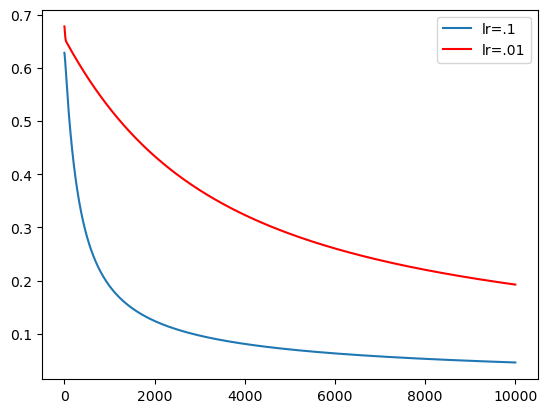  
 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$<br>
    
|learning rate|$\beta_0$| $\beta_1$| $\beta_2$|
|:-:|:-:|:-:|:-:|
|0.1|-29.9621|5.0617| 41.4960|    
|0.01|-11.0679| 1.2951| 16.4604|   

III. 劃出分隔模型的特點圖。   
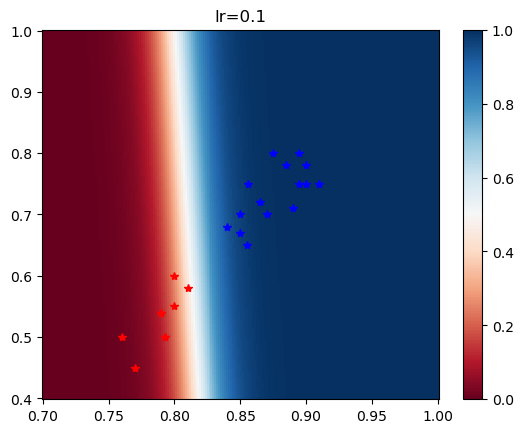
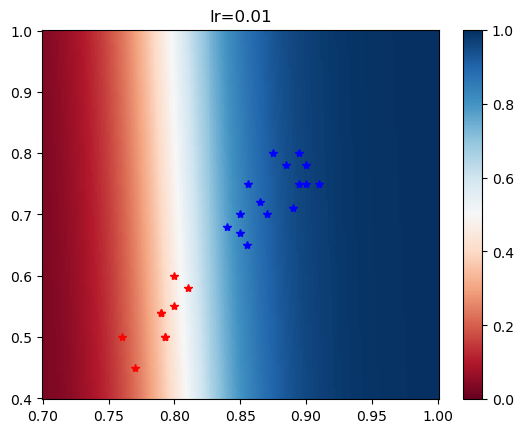

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


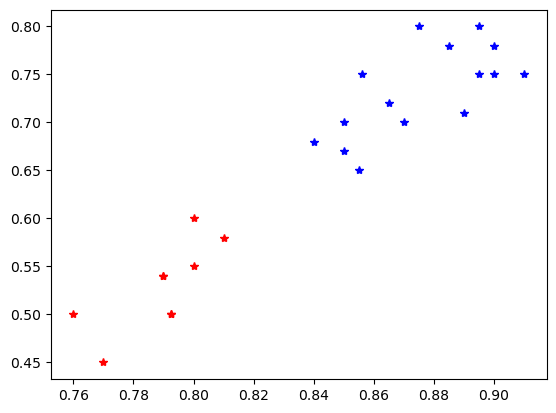

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt

def load_classification_example():
    filename='.\data_weight_multlfeatutes.xlsx'
    df = pd.read_excel(filename)
    labelencoder = LabelEncoder()
    df["性別"] = labelencoder.fit_transform(df["性別"]) # 將"性別"裡的字串自動轉換成數值
    df["手機品牌"] = labelencoder.fit_transform(df["手機品牌"]) # 將"手機品牌"裡的字串自動轉換成數值
    X = np.array(df[['身高', '體重', '手機品牌','體脂肪']])
    Y = np.array(df['性別'])
    return X, Y
data, target = load_classification_example()

data[:,0]=data[:,0]/200
data[:,1]=data[:,1]/100
data=data[:,0:2]

pos0=np.where(target==0)[0]
pos1=np.where(target==1)[0]
plt.figure()
plt.plot(data[pos0,0],data[pos0,1],'r*')
plt.plot(data[pos1,0],data[pos1,1],'b*')
plt.show()